<a href="https://colab.research.google.com/github/wjdolan/DS_Portfolio/blob/main/DyamicTimeWarp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dynamic Time Warp - Dollar Index vs Commodities

In [10]:
# pip install dtw-python
# !pip install yfinance

In [15]:
import yfinance as yf 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
from datetime import date


In [33]:
# import benchmark index and commodities

today = str(date.today())

ticker_dct = {
    'DX=F' : ['2018-01-01',today],
    'CL=F' : ['2018-01-01',today],
    'NG=F' : ['2018-01-01',today],
    'GC=F' : ['2018-01-01',today],
    'SI=F' : ['2018-01-01',today],
    'BTC' : ['2018-01-01',today]
}



In [34]:
def fetch_stock_data(ticker_dct):
    '''
    Function to fetch stock data through the yahoo finance
    stock api using the following format:
        - Key -> Ticker 
        - Values -> Start date, end date of the stock data
    
    params:
        ticker_dct (Dictionary) : The stocks you want to fetch the data for
        
    returns:
        This funciton will return a dictionary, the key will be the ticker
        and the value will be the data associated to that ticker over the
        specified user time period
    '''
    
    for k,v in ticker_dct.items():
        ticker_dct[k] = yf.download(k, v[0], v[1])
    return ticker_dct
  
dfs = fetch_stock_data(ticker_dct)
  
  
        


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


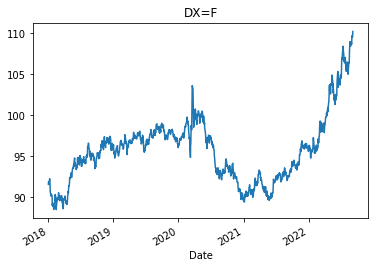

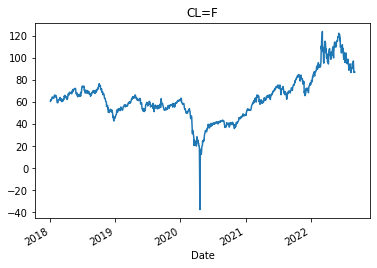

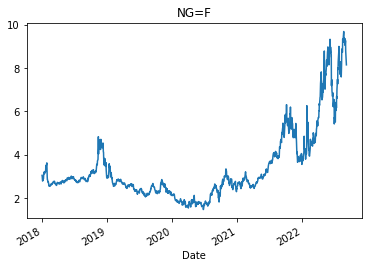

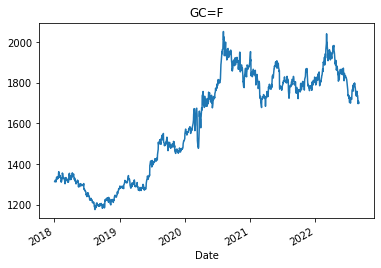

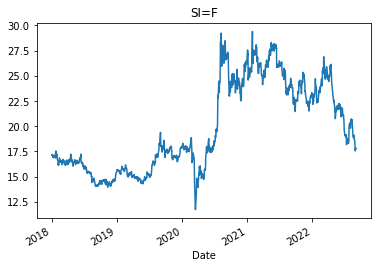

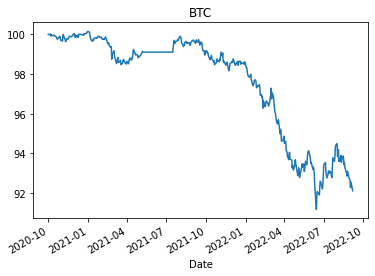

In [35]:
def visualize_close_prices(dfs):
    '''
    Function to visualize the closing prices associated
    to a given input dataframe
    '''
    for k,v in dfs.items():
        plt.title(k)
        v.Close.plot()
        plt.show()
visualize_close_prices(dfs)

In [47]:

# find similar stocks
# benchmark the dates to start from 0

for ticker, df in dfs.items():
    dates = df.index.values
    date_map = {date:idx for idx, date in enumerate(dates)}

    dfs[ticker]['benchmark_date'] = dfs[ticker].index.map(date_map)

dxy_df = dfs['DX=F']
distances = {}
for k,v in dfs.items():
    if k != 'DX=F':
        max_d = v['benchmark_date'].max()
        benchmark = np.array(dxy_df[dxy_df['benchmark_date'].between(0, max_d)]['Close'].values)

        y = np.array(v.Close.values)
        d,p = fastdtw(benchmark, y)
        distances[k] = d



In [50]:

dict(sorted(distances.items(), key=lambda item: item[1]))

{'BTC': 2207.150062561035,
 'CL=F': 38220.58561038971,
 'SI=F': 89305.33287715912,
 'NG=F': 108939.98591399193,
 'GC=F': 1771245.4945297241}